# MNIST Multi-layer perceptron with Tensorflow

In [1]:
import tensorflow as tf

D:\Users\bruno\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16043540605198583894
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1459512934
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2560512050461336651
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [5]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
# one hot: actual label is one hot coded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.num_examples

55000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mnist.train.images[1].shape

(784,)

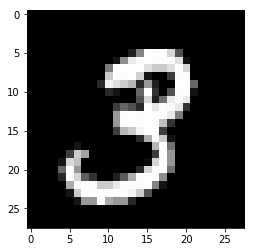

In [11]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='gist_gray')

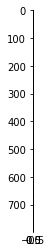

In [12]:
plt.imshow(mnist.train.images[1].reshape(784,1), cmap='gist_gray')

# Tensorflow Model

In [13]:
x = tf.placeholder(tf.float32, shape=[None, 784]) #Break the images into batches, cuz we have 50K of them 
# We know there are 784 pixels in the images

In [14]:
W = tf.Variable(tf.zeros([784,10])) #10??? 10 possible numbers.... # these are weights

In [15]:
b = tf.Variable(tf.zeros([10])) #Bias: just addint the bias. It's just adding one, so we don't need 784

# Neureal net formula:

In [16]:
y = tf.matmul(x,W) + b

In [17]:
y_true = tf.placeholder(tf.float32, shape=[None, 10]) # Training labels

In [18]:
mnist.train.labels[1] # This is the same as 3! That's why "one hot encoded"

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

# Cross Entropy to try reduce the error between true and predicting labels

In [19]:
cross_entropy = tf.reduce_min(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.4)
# Choose the right learning rate

In [21]:
train = optimizer.minimize(cross_entropy)

# Session and run the session

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    
    with tf.device("/gpu:0"):
        sess.run(init)

        for step in range(1000):

            batch_x, batch_y = mnist.train.next_batch(100)

            sess.run(train, feed_dict={x:batch_x,y_true:batch_y})

        matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))

        acc = tf.reduce_mean(tf.cast(matches, tf.float32))


        print(sess.run(acc, feed_dict={x:mnist.test.images, y_true: mnist.test.labels}))

0.098


In [24]:
with tf.Session() as sess:
    
        sess.run(init)

        for step in range(1000):

            batch_x, batch_y = mnist.train.next_batch(100)

            sess.run(train, feed_dict={x:batch_x,y_true:batch_y})

        matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))

        acc = tf.reduce_mean(tf.cast(matches, tf.float32))


        print(sess.run(acc, feed_dict={x:mnist.test.images, y_true: mnist.test.labels}))

0.0958
